In [1]:
from sklearn.linear_model import RidgeClassifier,SGDClassifier,LogisticRegression,LogisticRegressionCV,Perceptron
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ;sns.set()
import os
import io
import warnings

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier

from sklearn.metrics import hinge_loss
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, classification_report,accuracy_score

from sklearn.model_selection import cross_validate, cross_val_predict, GridSearchCV

from pprint import pprint

In [1]:
#pip install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/2d/30/3afb8bcb785653254eb646ff2680ec4d637b40b06f4b046aca17b5e086b0/scikit_learn-1.3.0-cp39-cp39-win_amd64.whl.metadata
  Using cached scikit_learn-1.3.0-cp39-cp39-win_amd64.whl.metadata (11 kB)
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
    --------------------------------------- 0.1/9.3 MB 3.5 MB/s eta 0:00:03
    --------------------------------------- 0.1/9.3 MB 2.8 MB/s eta 0:00:04
    --------------------------------------- 0.2/9.3 MB 1.2 MB/s eta 0:00:08
   - -------------------------------------- 0.4/9.3 MB 2.5 MB/s eta 0:00:04
   - -------------------------------------- 0.5/9.3 MB 2.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/9.3 MB 1.8 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.3 MB 2.4 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.3 MB 2.4 MB/s eta 0:00:04
   --- -------------------------

In [2]:
from sklearn import metrics
from collections import Counter
import pandas as pd

pd.Series(dir(metrics)).unique()

array(['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric',
       'PrecisionRecallDisplay', 'PredictionErrorDisplay',
       'RocCurveDisplay', '__all__', '__builtins__', '__cached__',
       '__doc__', '__file__', '__loader__', '__name__', '__package__',
       '__path__', '__spec__', '_base', '_classification',
       '_dist_metrics', '_pairwise_distances_reduction', '_pairwise_fast',
       '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score',
       'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc',
       'average_precision_score', 'balanced_accuracy_score',
       'brier_score_loss', 'calinski_harabasz_score', 'check_scoring',
       'class_likelihood_ratios', 'classification_report', 'cluster',
       'cohen_kappa_score', 'completeness_score', 'confusion_matrix',
       'consensus_score', 'coverage_error', 'd2_absolute_error_score',
       'd2_pinball_score', 'd2_tweedie_score', 'davies_bouldin_score',
       'dcg_score', 'det_curve', 'euclidean_di

In [3]:
%%time
x,y = fetch_openml('mnist_784', version=1 ,return_X_y=True )

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
# Transforming data to numpy array

x= np.array(x)
y = np.array(y)

In [5]:
# Unique labels in the dataset
np.unique(y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [7]:
# Shape of dataset

x.shape ,y.shape

((70000, 784), (70000,))

In [8]:
Counter(y)

Counter({'5': 6313,
         '0': 6903,
         '4': 6824,
         '1': 7877,
         '9': 6958,
         '2': 6990,
         '3': 7141,
         '6': 6876,
         '7': 7293,
         '8': 6825})

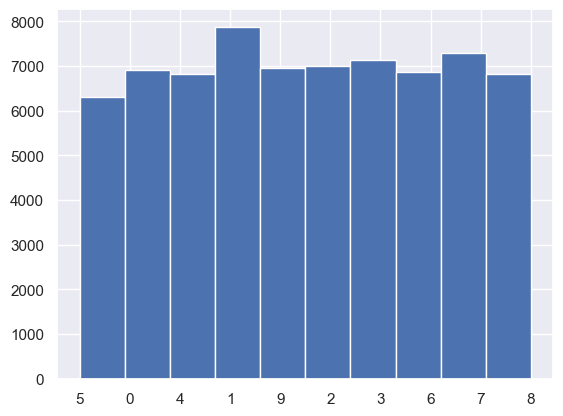

In [9]:
plt.hist(y)
plt.grid(True)
plt.show()

In [10]:
# Scaling the data using Normalization
x = MinMaxScaler().fit_transform(x)

min = np.min(x)
print(min)
max = np.max(x)
print(max)

0.0
1.0


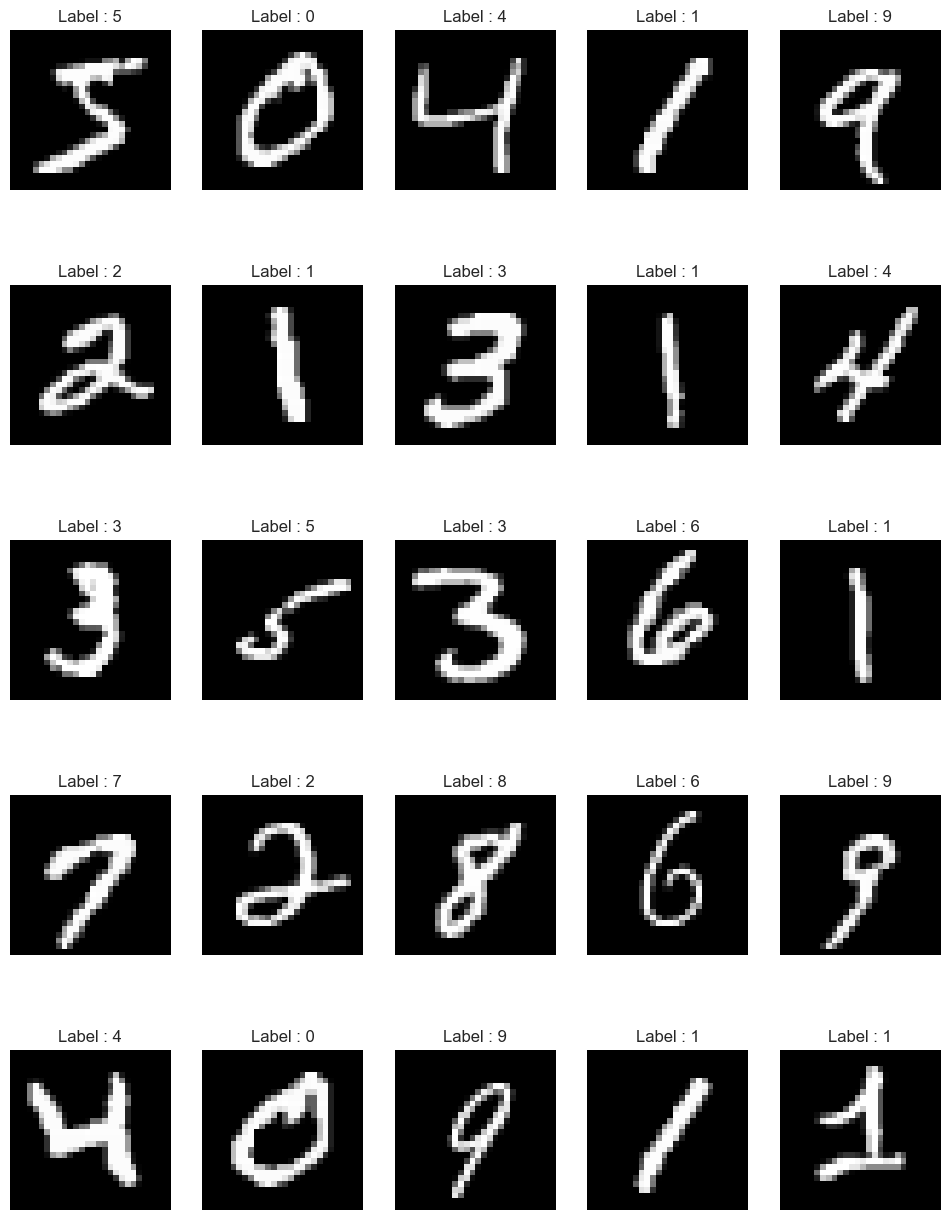

In [11]:
# Data Visualization

# Choose a square number

number = 25

sqr = int(np.sqrt(number))
fig,ax = plt.subplots(sqr,sqr,figsize=(12,16))

idx_offset = 0 

for i in range(sqr):
  index = idx_offset + i*(sqr)
  for j in range(sqr):
    ax[i,j].imshow(x[index+j].reshape(28,28), cmap='gray')
    ax[i,j].set_title(f'Label : {str(y[index+j])}')
    ax[i,j].set_axis_off()

In [13]:
xtrain, xtest, ytrain, ytest = x[:60000], x[60000:], y[:60000], y[60000:]

### **Modifying Labels**

* Let us start with a simple classification problem, i.e **binary classification**.

* Since the original label vector contains **10** classes, we need to modify the number of classes to 2.

* Therefore, the label **0** will be changed **1** and all the other labels (1-9) will be changed to **-1**.

* We will name the label vectors as `y_train_0` and `y_test_0`.

In [14]:
ytrain_0 = -1*np.ones(len(ytrain))
ytest_0 = -1*np.ones(len(ytest))

idx0 = np.where(ytrain == "0")
ytrain_0[idx0] = 1

idx0 = np.where(ytest == "0")
ytest_0[idx0] = 1

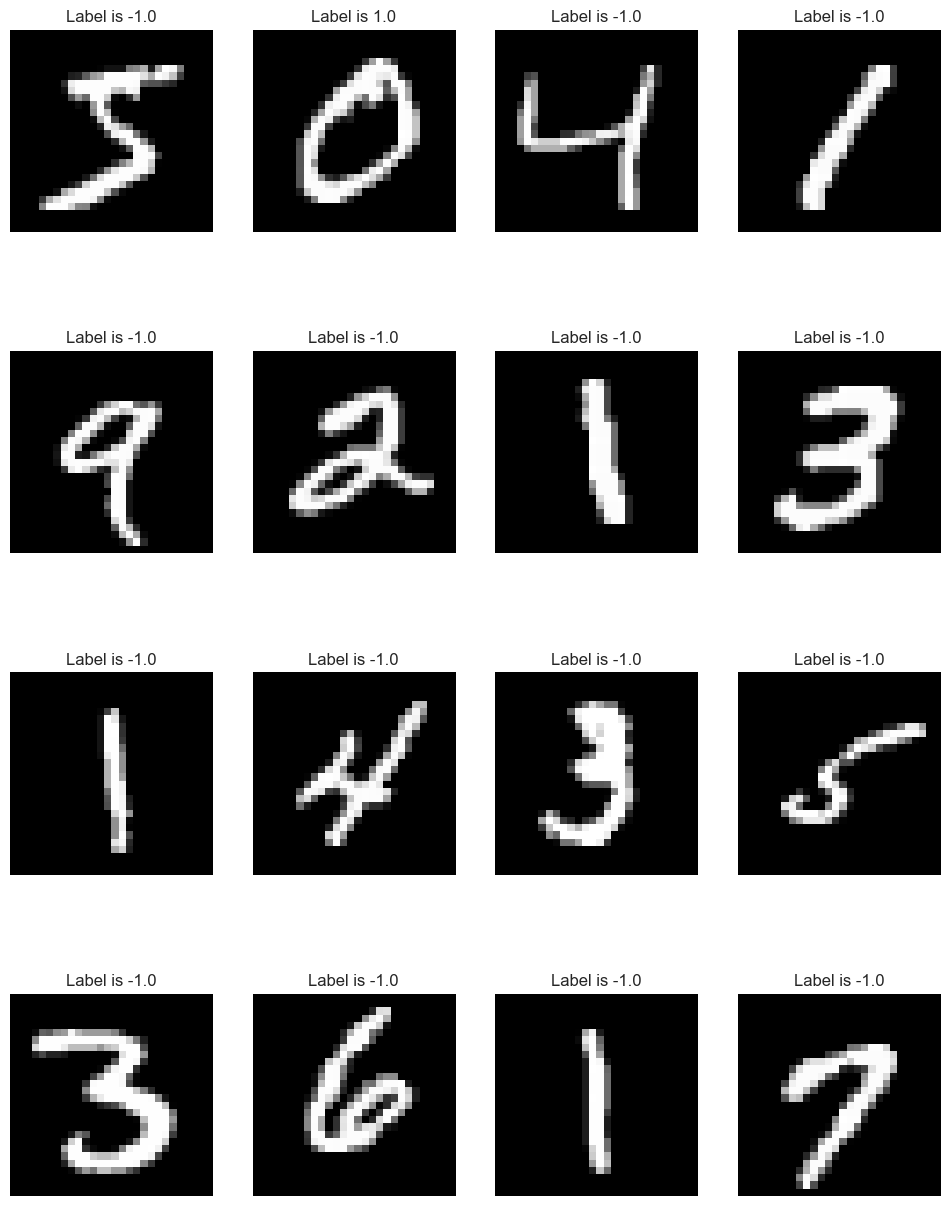

In [15]:
number = 16

sqr = int(np.sqrt(number))

fig,ax = plt.subplots(sqr,sqr,figsize=(12,16))

offset = 0

for i in range(sqr):
    index = offset + i*sqr
    for j in range(sqr):
        ax[i,j].imshow(xtrain[index+j].reshape(28,28),cmap = "gray")
        ax[i,j].set_title(f"Label is {ytrain_0[index+j]}")
        ax[i,j].set_axis_off()


In [16]:
# Baseline Model

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(xtrain,ytrain_0)

ypred_0 = dummy.predict(xtest)

s = dummy.score(xtrain,ytrain_0)
print("Accuracy of training data",s)

a = dummy.score(xtest,ytest_0)
a

Accuracy of training data 0.9012833333333333


0.902

In [17]:
clf = Perceptron(max_iter = 100, random_state = 1729)

In [18]:
clf.fit(xtrain,ytrain_0)

print('Dimension of Weights : {0}'.format(clf.coef_.shape))
print('Bias : {0}'.format(clf.intercept_))
print('Loss function : {0}'.format(clf.loss_function_))

Dimension of Weights : (1, 784)
Bias : [-108.]
Loss function : <sklearn.linear_model._sgd_fast.Hinge object at 0x0000024B9601E950>


In [19]:
ypred_tr_perc_0 = clf.predict(xtrain)

print(f"Training accuracy is {clf.score(xtrain,ytrain_0)}")

Training accuracy is 0.99095


In [20]:
print('Test accuracy :',clf.score(xtest,ytest_0))

Test accuracy : 0.989


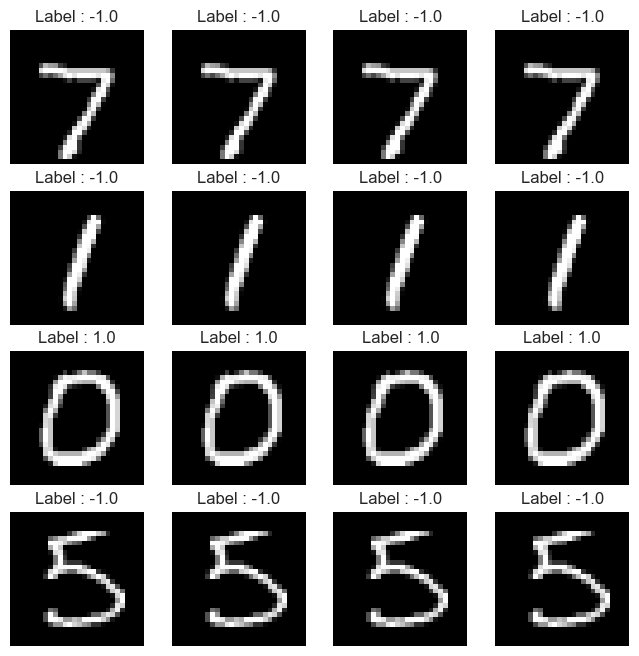

In [21]:
ypred_ts_perc_0 = clf.predict(xtest)

n = 4

fig,ax = plt.subplots(n,n,figsize=(8,8))

offset = 0

for i in range(n):
    index = offset + i*n
    for j in range(n):
        ax[i,j].imshow(xtest[index+i].reshape(28,28),cmap = "gray")
        ax[i,j].set_title(f"Label : {ypred_ts_perc_0[index+i]}")
        ax[i,j].set_axis_off()

[[53955   122]
 [  421  5502]]
59457


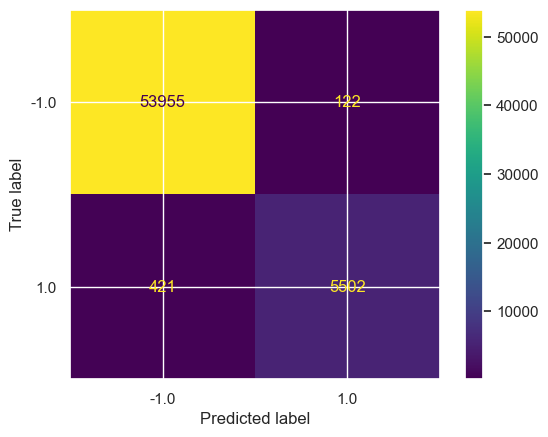

In [22]:
ConfusionMatrixDisplay.from_predictions(ytrain_0,ypred_tr_perc_0)
cm = confusion_matrix(ytrain_0,ypred_tr_perc_0)

# Confusion matrix
print(np.array(cm))

# Sum of true predictions
print(np.trace(np.array(cm)))

In [23]:
cv = cross_validate(clf,
                    xtrain,
                    ytrain_0,
                    scoring = ['precision', 'recall', 'f1'],
                    cv=5,
                    return_estimator=True,
                    return_train_score=True)

In [24]:
"""This is only possible when only one scoring function is provided"""
#cv["test_score"]

KeyError: 'test_score'

In [30]:
(cv['test_precision'])

array([0.95890411, 0.98828125, 0.95319149, 0.95090439, 0.96200345])

In [31]:
(cv['test_recall'])

array([0.94594595, 0.85472973, 0.94514768, 0.93164557, 0.94008439])

In [32]:
print(classification_report(ytrain_0,ypred_tr_perc_0))

              precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99     54077
         1.0       0.98      0.93      0.95      5923

    accuracy                           0.99     60000
   macro avg       0.99      0.96      0.97     60000
weighted avg       0.99      0.99      0.99     60000



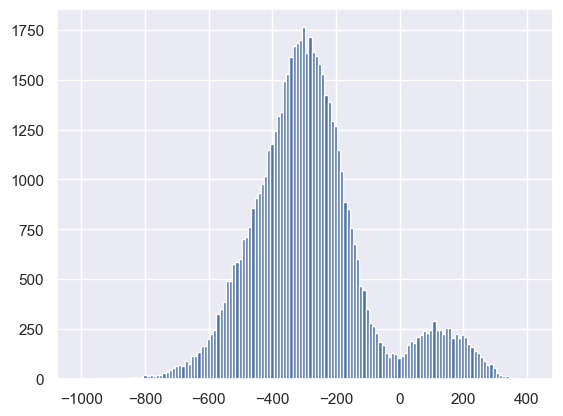

In [33]:
bin_clf = Perceptron(random_state=1729)
bin_clf.fit(xtrain,ytrain_0)

yscore = bin_clf.decision_function(xtrain)

plt.hist(np.sort(yscore),bins = 'auto')
plt.show()

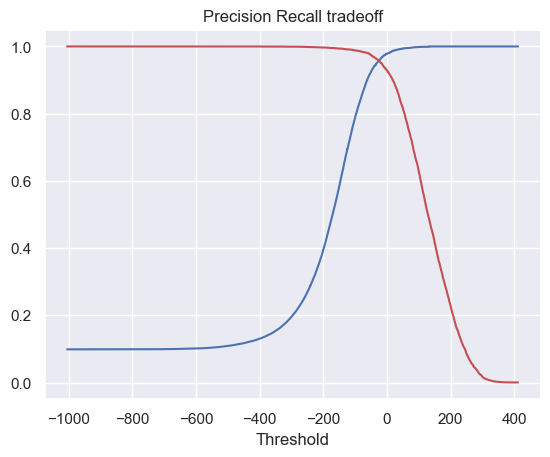

In [34]:
precision,recall,threshold = precision_recall_curve(ytrain_0,yscore)

plt.plot(threshold,precision[:-1],"b-")
plt.plot(threshold,recall[:-1],"r-")
plt.xlabel("Threshold")
plt.title("Precision Recall tradeoff")
plt.show()

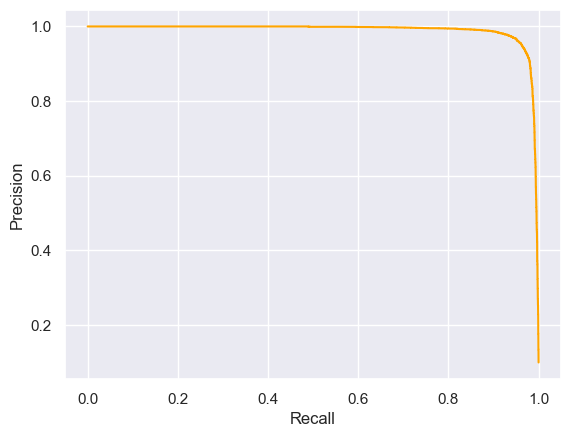

In [35]:
plt.plot(recall[:-1],precision[:-1],"orange")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

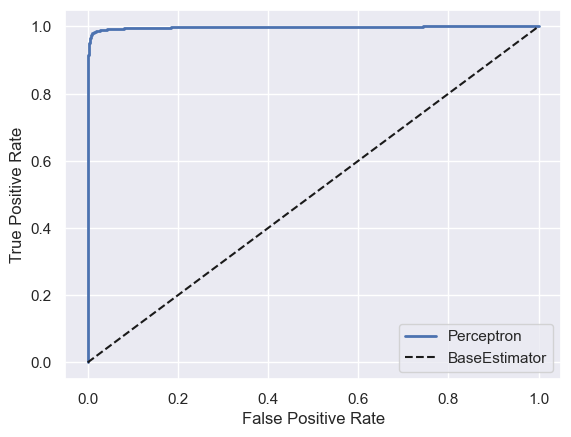

In [36]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(ytrain_0,yscore)

plt.plot(fpr, tpr, linewidth=2, label='Perceptron')
plt.plot([0, 1], [0, 1], 'k--', label='BaseEstimator')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

In [37]:
from sklearn.preprocessing import LabelBinarizer

## **Multiclass Classification (OneVsAll)**

* We know that the perceptron is a binary classifier. However,
MNIST dataset contains 10 classes. So, we need to extend the idea to handle multi-class problem.

* **Solution** : Combining multiple binary classifiers and devise a suitable scoring metric.

* Sklearn makes it extremely easy without modifying a single line of code that we have written for the binary classifier.

* Sklearn does this by counting a number of unique elements (10 in this case) in the label vector `y_train` and converting labels using `Labelbinarizer` to fit each binary classifier.


In [40]:
y_train_ovr = LabelBinarizer().fit_transform(ytrain)

for i in range(10):
    print('{0} : {1}'.format(ytrain[i],y_train_ovr[i]))

5 : [0 0 0 0 0 1 0 0 0 0]
0 : [1 0 0 0 0 0 0 0 0 0]
4 : [0 0 0 0 1 0 0 0 0 0]
1 : [0 1 0 0 0 0 0 0 0 0]
9 : [0 0 0 0 0 0 0 0 0 1]
2 : [0 0 1 0 0 0 0 0 0 0]
1 : [0 1 0 0 0 0 0 0 0 0]
3 : [0 0 0 1 0 0 0 0 0 0]
1 : [0 1 0 0 0 0 0 0 0 0]
4 : [0 0 0 0 1 0 0 0 0 0]


In [41]:
clf = Perceptron(random_state=1729)
clf.fit(xtrain,ytrain)

Perceptron(random_state=1729)

* What had actually happened internally was that the API automatically created 10 binary classifiers, converted labels to binary sparse matrix and trained them with the binarized labels.

* During the inference time, the input will be passed through all these 10 classifiers and the highest score among the output from the classifiers will be considered as the predicted class.

* To see it in action, let us execute the following lines of code.

In [42]:
print('Shape of Weight matrix : {0} and bias vector : {1}'.format(
    clf.coef_.shape, clf.intercept_.shape))

Shape of Weight matrix : (10, 784) and bias vector : (10,)


In [43]:
for i in range(12):
    score = clf.decision_function(xtrain[i].reshape(1,-1))
    print(score)
    print("-"*20)
    print(f"Predicted class is : {np.argmax(score)}",end = " ")
    print("&",end =" ")
    print(f"Actual class is : {ytrain[i]}")
    
    print("*"*50)
    print("*"*50)
    print("\n")

[[-281.59403306 -316.86757401 -163.89196463  -29.53201077 -360.15901576
    35.74422145 -281.75632449 -129.84598231 -269.37986928 -232.78886582]]
--------------------
Predicted class is : 5 & Actual class is : 5
**************************************************
**************************************************


[[ 163.56542868 -383.99440215 -217.57545559 -208.67775471 -341.63012687
  -200.703391   -272.04836601 -265.31963091 -205.48413687 -254.29404075]]
--------------------
Predicted class is : 0 & Actual class is : 0
**************************************************
**************************************************


[[-333.95381776 -222.07201845 -112.63298731  -31.12224529   41.19340254
  -231.70143791 -294.13151865 -140.55028066 -336.50911188 -242.68656671]]
--------------------
Predicted class is : 4 & Actual class is : 4
**************************************************
**************************************************


[[-246.03221838   87.48547482  -63.78459054  -88.469

In [44]:
ypred_mul = clf.predict(xtrain)

In [45]:
print(classification_report(ytrain,ypred_mul))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      5923
           1       0.94      0.98      0.96      6742
           2       0.89      0.90      0.90      5958
           3       0.86      0.87      0.87      6131
           4       0.89      0.94      0.91      5842
           5       0.81      0.88      0.85      5421
           6       0.92      0.97      0.94      5918
           7       0.91      0.94      0.92      6265
           8       0.92      0.77      0.84      5851
           9       0.92      0.82      0.87      5949

    accuracy                           0.90     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.91      0.90      0.90     60000



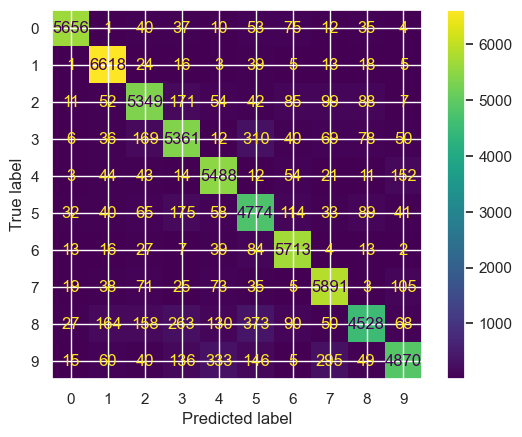

In [47]:
cm_display = ConfusionMatrixDisplay.from_predictions(
    ytrain,ypred_mul, values_format='.5g') 

#### **Iteration vs Loss Curve**

The other way of plotting **Iteration Vs Loss Curve** with the `Partial_fit` method.

In [48]:
iter = 100 
bin_clf1 = Perceptron(max_iter=100,random_state=2094)
loss_clf1=[]

for i in range(iter):
    bin_clf1.partial_fit(xtrain,ytrain_0,classes=np.array([1,-1])) 
    y_hat_0 = bin_clf1.decision_function(xtrain)
    loss_clf1.append(hinge_loss(ytrain_0,y_hat_0))

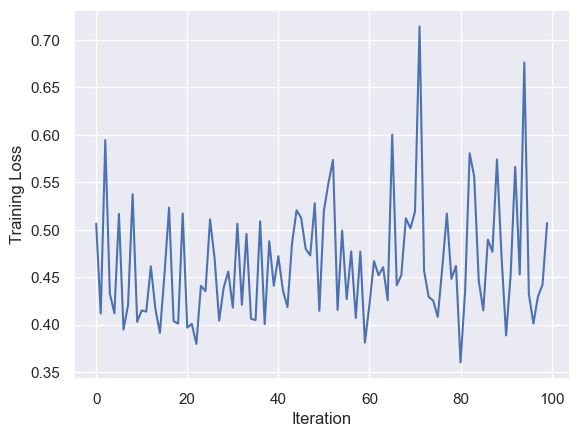

In [50]:
plt.figure()
plt.plot(np.arange(iter), loss_clf1)

plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Training Loss')
plt.show()

# WEEK 6

In [51]:
from sklearn.model_selection import cross_validate, RandomizedSearchCV, cross_val_predict 
from sklearn.metrics import log_loss 

from scipy.stats import loguniform 
from sklearn.metrics import roc_curve, roc_auc_score 

In [52]:
# Ignore all warnings (convergence..) by sklearn
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn


In [53]:
#Transforming label into binary classes, where for positive class, we will represent it through 1 and for negative 0
ytrain_0 = np.zeros(len(ytrain))
ytest_0 = np.zeros(len(ytest))
idx = np.where(ytrain == "0")

ytrain_0[idx] = 1

idx = np.where(ytest == "0")
ytest_0[idx] = 1

#### **Training without regularization**

> We will use SGDClassifier and provide log loss so that it will work as `LogisticRegression`

Set `eta0 = 0.01,learning_rate = 'constant' ` and `alpha = 0`.

In [56]:
clf =  SGDClassifier(loss ='log_loss',
                     penalty ="l2",
                     eta0=0.01,
                     alpha = 0,
                     learning_rate='constant',
                     warm_start=True,
                     random_state=1729)

loss = []
iter = 100
for i in range(iter):
    clf.fit(xtrain,ytrain_0)
    ypred = clf.predict_proba(xtrain)
    loss.append(log_loss(ytrain_0,ypred))

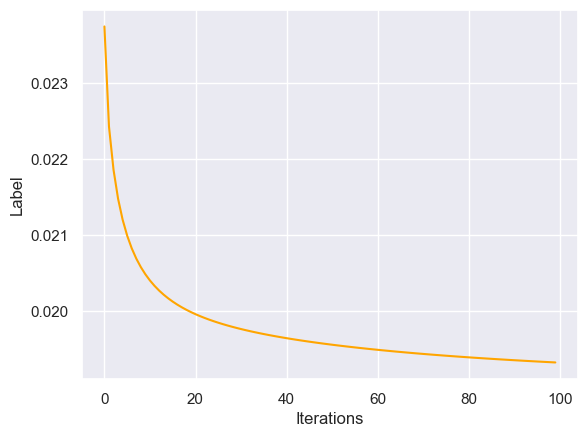

In [57]:
plt.plot(np.arange(iter),loss,"orange",label ='loss curve')
plt.xlabel('Iterations')
plt.ylabel('Label')
plt.show()

In [60]:
print('Training accuracy : {0:.4f}'.format(clf.score(xtrain,ytrain_0)))
print('Testing accuracy : {0:.4f}'.format(clf.score(xtest,ytest_0)))

Training accuracy : 0.9943
Testing accuracy : 0.9917


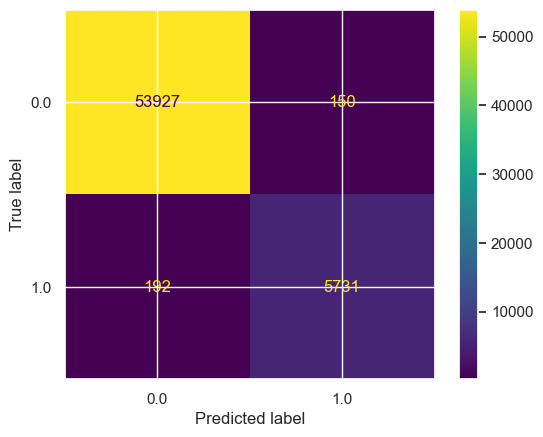

In [62]:
y_pred_train_0 = clf.predict(xtrain)

cm_display = ConfusionMatrixDisplay.from_predictions(
    ytrain_0, y_pred_train_0, values_format='.5g')
plt.show()

In [63]:
print(classification_report(ytrain_0,y_pred_train_0))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     54077
         1.0       0.97      0.97      0.97      5923

    accuracy                           0.99     60000
   macro avg       0.99      0.98      0.98     60000
weighted avg       0.99      0.99      0.99     60000



In [66]:
# Cross Validate

estimator = SGDClassifier(loss='log_loss',
                          penalty='l2',
                          max_iter=100,
                          warm_start=False,
                          eta0=0.01,
                          alpha=0,
                          learning_rate='constant',
                          random_state=1729)

In [67]:
cv = cross_validate(estimator,xtrain,ytrain_0,cv=5,scoring=['precision', 'recall', 'f1'],
                            return_train_score=True,
                            return_estimator=True)
cv

{'fit_time': array([1.66866207, 1.49011087, 1.38895774, 1.51361895, 1.26697946]),
 'score_time': array([0.05743408, 0.04630351, 0.04784203, 0.03648233, 0.0445087 ]),
 'estimator': [SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log_loss',
                max_iter=100, random_state=1729),
  SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log_loss',
                max_iter=100, random_state=1729),
  SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log_loss',
                max_iter=100, random_state=1729),
  SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log_loss',
                max_iter=100, random_state=1729),
  SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log_loss',
                max_iter=100, random_state=1729)],
 'test_precision': array([0.95538721, 0.96382429, 0.97238999, 0.96735395, 0.95952782]),
 'train_precision': array([0.97419355, 0.97321046, 0.96473818, 0.97701149, 0.96404399])

In [68]:
weights = clf.coef_
bias = clf.intercept_

print('Bias :', bias)
print('Shape of weights :', weights.shape)
print('Shape of bias :', bias.shape)

Bias : [-5.01034596]
Shape of weights : (1, 784)
Shape of bias : (1,)


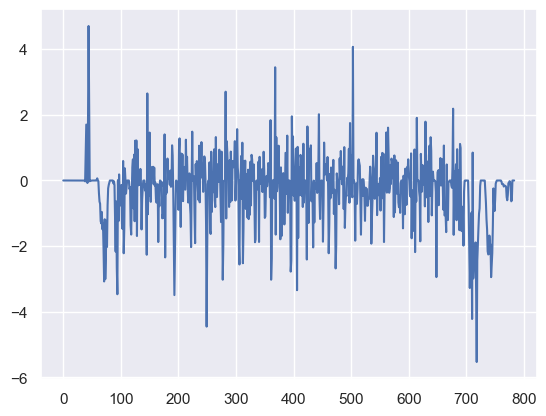

In [69]:
plt.figure()
plt.plot(np.arange(0,784),weights[0,:])
plt.show()

In [71]:
zero_weight = np.where(weights[0]==0)
print(zero_weight)
len(zero_weight[0])

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  52,  53,  54,  55,  56,  57,  82,  83,  84,  85, 111,
       112, 140, 141, 168, 476, 560, 644, 645, 671, 672, 673, 699, 700,
       701, 727, 728, 729, 730, 754, 755, 756, 757, 758, 759, 780, 781,
       782, 783], dtype=int64),)


67

#### **Training with regularization**

However, what happens to the performance of the model if we penalize, out of temptation, the weight values even to a smaller degree.

In [72]:
bin_sgd_clf_l2 = SGDClassifier(loss='log_loss',
                               penalty='l2',
                               eta0=0.01,
                               alpha=0.001,
                               max_iter=1,
                               warm_start=True,
                               learning_rate='constant',
                               random_state=1729
                               )

In [73]:
loss = []
iter = 100

for i in range(iter):
    bin_sgd_clf_l2.fit(xtrain,ytrain_0)
    ypred = bin_sgd_clf_l2.predict_proba(xtrain)
    loss.append(log_loss(ytrain_0,ypred))

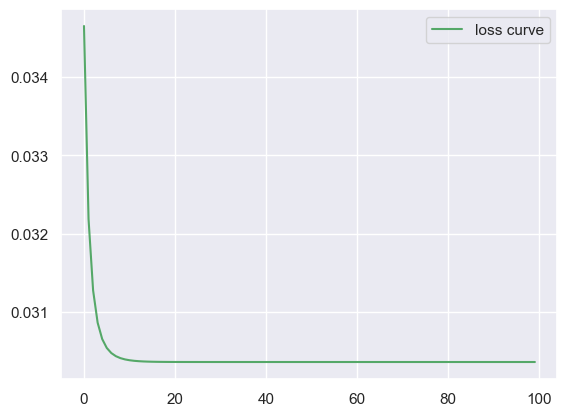

In [74]:
plt.plot(np.arange(iter),loss,"g-",label="loss curve")
plt.legend()
plt.show()

In [75]:
print('Training accuracy : {0:.4f}'.format(bin_sgd_clf_l2.score(xtrain,ytrain_0)))

print('Testing accuracy : {0:.4f}'.format(bin_sgd_clf_l2.score(xtest,ytest_0)))

Training accuracy : 0.9907
Testing accuracy : 0.9905


In [77]:
weights = bin_sgd_clf_l2.coef_
bias = bin_sgd_clf_l2.intercept_

print(f"shape of weight {weights.shape}")
print(f"Bias term {bias}")


shape of weight (1, 784)
Bias term [-4.43002876]


# Weight value vs Feature Curve


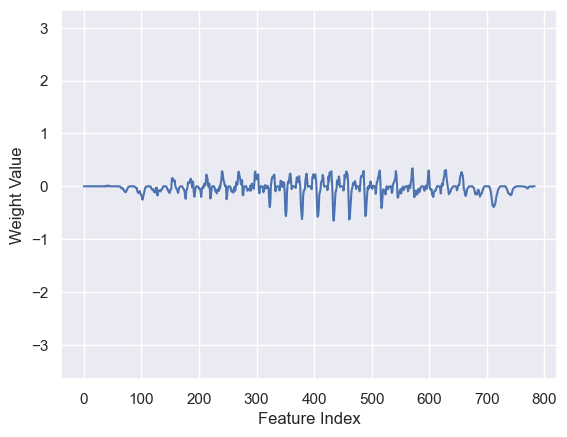

In [80]:
plt.plot(np.arange(784),weights[0,:])
plt.ylim(np.min(weights[0]-3), np.max(weights[0])+3)
plt.xlabel('Feature Index')
plt.ylabel('Weight Value')
plt.grid(True)
plt.show()
plt.show()

In [83]:
lr_grid =loguniform(1e-2,1e-1)

In [86]:
estimator = SGDClassifier(loss='log_loss',
                          penalty='l2',
                          max_iter=1,
                          warm_start=True,
                          eta0=0.01,
                          alpha=0,
                          learning_rate='constant',
                          random_state=1729)

scores = RandomizedSearchCV(estimator,
                            param_distributions={'eta0': lr_grid},
                            cv=5,
                            scoring=['precision', 'recall', 'f1'],
                            n_iter=5,
                            refit='f1')


In [87]:
scores.fit(xtrain,ytrain_0)

RandomizedSearchCV(cv=5,
                   estimator=SGDClassifier(alpha=0, eta0=0.01,
                                           learning_rate='constant',
                                           loss='log_loss', max_iter=1,
                                           random_state=1729, warm_start=True),
                   n_iter=5,
                   param_distributions={'eta0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000024B95C93820>},
                   refit='f1', scoring=['precision', 'recall', 'f1'])

In [91]:
scores.best_estimator_

SGDClassifier(alpha=0, eta0=0.03270468245815856, learning_rate='constant',
              loss='log_loss', max_iter=1, random_state=1729, warm_start=True)

# Naive Bayes Classifier

### Text Classification using Naive Bayes classifier

In [92]:
import numpy as np 

# data loading  
from sklearn.datasets import fetch_20newsgroups 

# preprocessing 
from sklearn.feature_extraction.text import TfidfVectorizer 

# model / estimator 
from sklearn.naive_bayes import MultinomialNB,ComplementNB

# pipeline utilty 
from sklearn.pipeline import Pipeline 

# model evaluation 
from sklearn.metrics import ConfusionMatrixDisplay 

In [95]:
?fetch_20newsgroups

In [ ]:
categories = ['talk.religion.misc',
              'soc.religion.christian', 'sci.space', 'comp.graphics']

train = fetch_20newsgroups(subset='train' ,categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [105]:
test.target

array([3, 0, 1, ..., 1, 2, 0], dtype=int64)

In [99]:
pipe = Pipeline([("vectorizer",TfidfVectorizer()),("NBclass",MultinomialNB())])

pipe.fit(train.data,train.target)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('NBclass', MultinomialNB())])

In [100]:
test_pred =pipe.predict(test.data)

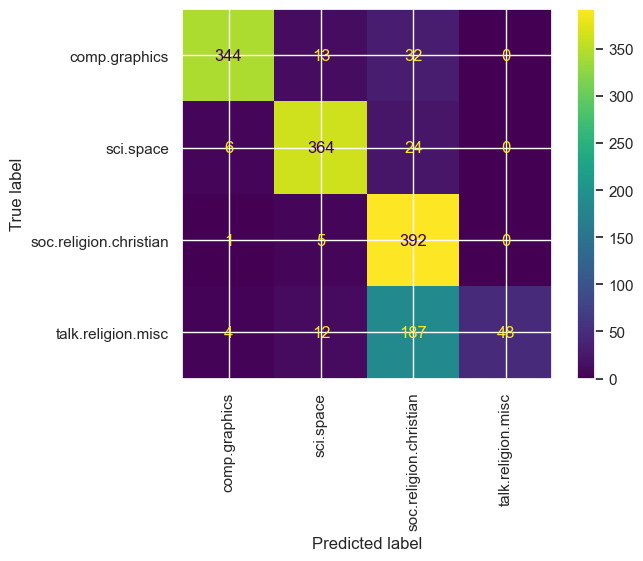

In [108]:
ConfusionMatrixDisplay.from_estimator(pipe, test.data ,test.target ,display_labels=test.target_names ,xticks_rotation='vertical')

plt.show()

In [127]:
def predict_category(s, train=train ,model=pipe):
    pred = model.predict([s])
    print(pred)
    return train.target_names[pred[0]]

In [132]:
predict_category('Jai Shree Ram')

[0]


'comp.graphics'

In [138]:
print(classification_report(test.target,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       389
           1       0.92      0.92      0.92       394
           2       0.62      0.98      0.76       398
           3       1.00      0.19      0.32       251

    accuracy                           0.80      1432
   macro avg       0.88      0.75      0.73      1432
weighted avg       0.86      0.80      0.77      1432



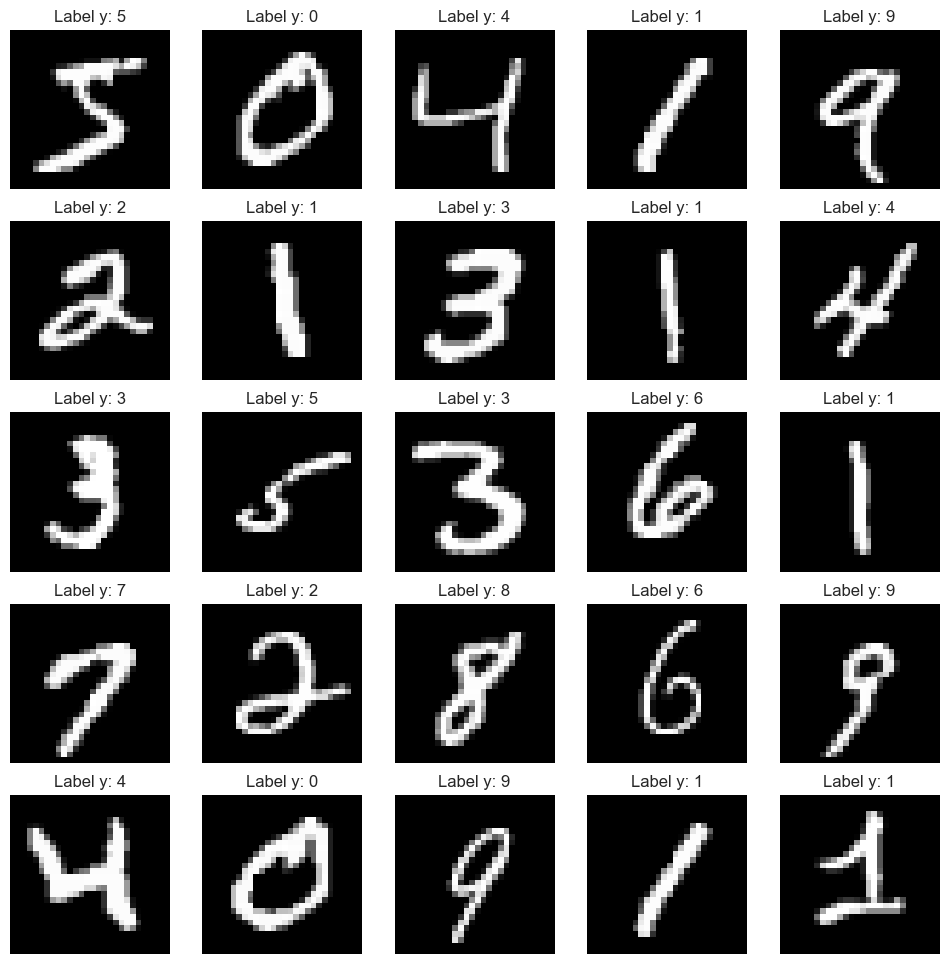

In [146]:
from sklearn.metrics import make_scorer

fig = plt.figure(figsize=(12, 12))

for i in range(25):
  ax = fig.add_subplot(5, 5, i + 1)
  ax.imshow(xtrain[i].reshape(28,28), cmap='gray')
  ax.set_title(f'Label y: {ytrain[i]}')
  plt.axis('off')
     